# Un nuevo modelo ARIMA

## Instrucciones
Ahora que has construido un modelo de ARIMA, construye uno nuevo con datos frescos (prueba uno de estos conjuntos de datos de Duke). Anota tu trabajo en un notebook, visualiza los datos y tu modelo, y prueba su precisión usando MAPE.

### Acerca del conjunto de datos

[Este conjunto de datos](https://www.kaggle.com/datasets/charanchandrasekaran/top-6-economies-in-the-world-by-gdp) contiene datos sobre indicadores clave de las 6 principales economías del mundo (por PIB), que incluyen EE. UU., China, Japón, Alemania, Reino Unido e India entre el intervalo de tiempo de 30 años de 1990 a 2020. Datos extraídos del sitio web de datos del Banco Mundial y procesado utilizando la biblioteca Python Pandas. Este conjunto de datos podría utilizarse para realizar análisis y pronósticos de series temporales.

#### INDICADORES
* PIB (USD actuales)
* PIB, PPA (dólares internacionales corrientes)
* PIB per cápita (USD actuales)
* Crecimiento del PIB (%) anual
* Importaciones de bienes y servicios (% del PIB)
* Exportaciones de bienes y servicios (% del PIB)
* Deuda del gobierno central, total (% del PIB)
* Reservas totales (incluye oro, dólares estadounidenses actuales)
* Desempleo, total (% de la fuerza laboral total) (estimación modelada de la OIT)
* Inflación, precios al consumo (% anual)
* Remesas personales recibidas (% del PIB)
* Población, total
* Crecimiento de la población (%) anual
* Esperanza de vida al nacer, total (años)
* Tasa de pobreza: 1,90 dólares al día (PPA de 2011) (% de la población)

In [1]:
#Data cleaning
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Preparación de los datos

In [2]:
def country_df(country_name,reqcol):
    
    #loading data 
    df=pd.read_csv('../Data/top_six_economies.csv')
    
    #querry data based on the given country name
    country_df=df.loc[(df["Country Name"]==country_name)]
    
    country=country_df.copy()
    
    country.drop('Unnamed: 0',axis=1,inplace=True)
    
    country.set_index('Country Name')
    
    return country[reqcol]

Hemos creado una función llamada `country_df` que toma el nombre de un país y las columnas requeridas como entrada, y devuelve un DataFrame que contiene los datos de ese país específico para las columnas especificadas. Esto facilita la extracción de datos específicos para cada país de tu conjunto de datos principal.

### Columnas requeridas para el análisis y visualización

In [4]:
col=['Country Name','Year','GDP (current US$)','GDP, PPP (current international $)',
     'GDP per capita (current US$)','GDP growth (annual %)',
     'Imports of goods and services (% of GDP)',
     'Exports of goods and services (% of GDP)',
     'Unemployment, total (% of total labor force) (modeled ILO estimate)',
     'Population, total','Population growth (annual %)',
     'Life expectancy at birth, total (years)',
     'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)']

Tambien definimos una lista de columnas requeridas (`col`) para el análisis y la visualización. Estas columnas incluyen medidas macroeconómicas importantes como el PIB, el ingreso per cápita, el crecimiento del PIB, el porcentaje de importaciones y exportaciones, el desempleo, la población, la esperanza de vida y la tasa de pobreza.

Obtención de datos del csv principal, en este bloque los datos relacionados con EE. UU. y CHINA se extraen del archivo top_six_economies.csv
El marco de datos de ambos países contiene datos relacionados con medidas macroeconómicas como el PIB, el ingreso per cápita, el porcentaje de importación y exportación, etc., desde 1991 hasta 2020

In [7]:
# USA
usa=country_df(country_name="United States",reqcol=col)

# China
china=country_df(country_name="China",reqcol=col)

Las 5 principales del marco de datos de EE. UU.

In [9]:
usa.info()
usa.head()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Country Name                                                         30 non-null     object 
 1   Year                                                                 30 non-null     int64  
 2   GDP (current US$)                                                    30 non-null     float64
 3   GDP, PPP (current international $)                                   30 non-null     float64
 4   GDP per capita (current US$)                                         30 non-null     float64
 5   GDP growth (annual %)                                                30 non-null     float64
 6   Imports of goods and services (% of GDP)                             30 non-null     float64
 7   Exports of good

,Country Name,Year,GDP (current US$),"GDP, PPP (current international $)",GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)
0,United States,1991,6.158129e+12,6.158129e+12,24342.258905,-0.108265,10.125543,9.660905,6.80,252981000.0,1.336261,75.365854,0.5
1,United States,1992,6.520327e+12,6.520327e+12,25418.990776,3.522441,10.241680,9.708915,7.50,256514000.0,1.386886,75.617073,0.5
2,United States,1993,6.858559e+12,6.858559e+12,26387.293734,2.751781,10.497438,9.547180,6.90,259919000.0,1.318680,75.419512,0.5
3,United States,1994,7.287236e+12,7.287236e+12,27694.853416,4.028793,11.162312,9.893147,6.12,263126000.0,1.226296,75.619512,0.5
4,United States,1995,7.639749e+12,7.639749e+12,28690.875701,2.684217,11.814158,10.639224,5.65,266278000.0,1.190787,75.621951,0.5


Algunas medidas estadísticas importantes del marco de datos de EE. UU. dado, que incluyen valores medios, percentiles, máximos y mínimos

In [10]:
usa.describe()

,Year,GDP (current US$),"GDP, PPP (current international $)",GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)
count,30.000000,3.000000e+01,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01,30.000000,30.000000,29.000000
mean,2005.500000,1.320973e+13,1.320973e+13,43754.501616,2.288380,14.121256,11.112766,5.928000,2.954754e+08,0.945598,77.392439,0.855172
std,8.803408,4.674607e+12,4.674607e+12,12355.698715,1.868823,2.154676,1.413266,1.641669,2.374427e+07,0.241759,1.190069,0.235412
min,1991.000000,6.158129e+12,6.158129e+12,24342.258905,-3.404590,10.125543,9.035659,3.670000,2.529810e+08,0.455381,75.365854,0.500000
25%,1998.250000,9.204907e+12,9.204907e+12,33269.105271,1.732426,12.484030,9.915374,4.647500,2.766505e+08,0.734254,76.581098,0.700000
50%,2005.500000,1.342739e+13,1.342739e+13,45212.703974,2.695293,14.494803,10.719706,5.590000,2.969483e+08,0.936831,77.487805,1.000000
75%,2012.750000,1.669589e+13,1.669589e+13,52914.450410,3.512635,15.823025,12.315318,6.875000,3.155144e+08,1.159644,78.540854,1.000000
max,2020.000000,2.137257e+13,2.137257e+13,65094.799429,4.794499,17.441948,13.644049,9.630000,3.315011e+08,1.386886,78.841463,1.200000


In [11]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Country Name                                                         30 non-null     object 
 1   Year                                                                 30 non-null     int64  
 2   GDP (current US$)                                                    30 non-null     float64
 3   GDP, PPP (current international $)                                   30 non-null     float64
 4   GDP per capita (current US$)                                         30 non-null     float64
 5   GDP growth (annual %)                                                30 non-null     float64
 6   Imports of goods and services (% of GDP)                             30 non-null     float64
 7   Exports of good

El marco de datos dado contiene 13 columnas y cada columna contiene 30 entradas

Las 5 principales del marco de datos de China

In [12]:
china.head()

,Country Name,Year,GDP (current US$),"GDP, PPP (current international $)",GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)
30,China,1991,3.833733e+11,1.258454e+12,333.142145,9.262786,10.629964,13.436371,2.37,1.150780e+09,1.364434,69.242,NaN
31,China,1992,4.269157e+11,1.470222e+12,366.460692,14.224530,12.542033,13.555544,2.37,1.164970e+09,1.225536,69.355,NaN
32,China,1993,4.447313e+11,1.714031e+12,377.389839,13.883729,13.902547,11.997883,2.69,1.178440e+09,1.149619,69.496,56.7
33,China,1994,5.643247e+11,1.978860e+12,473.492279,13.036807,17.233066,18.536749,2.90,1.191835e+09,1.130261,69.670,NaN
34,China,1995,7.345479e+11,2.241663e+12,609.656679,10.953954,16.324446,17.952523,3.00,1.204855e+09,1.086509,69.885,NaN


In [13]:
china.describe()

,Year,GDP (current US$),"GDP, PPP (current international $)",GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)
count,30.000000,3.000000e+01,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01,30.000000,30.000000,16.00000
mean,2005.500000,5.070277e+12,9.608151e+12,3722.204431,9.285176,19.649910,22.599810,3.980000,1.299286e+09,0.725246,73.081333,14.66875
std,8.803408,4.911756e+12,7.421558e+12,3489.084468,2.655472,4.885114,6.367606,0.793291,7.689492e+07,0.277037,2.558262,18.14926
min,1991.000000,3.833733e+11,1.258454e+12,333.142145,2.239702,10.629964,11.997883,2.370000,1.150780e+09,0.238041,69.242000,0.10000
25%,1998.250000,1.045282e+12,3.110635e+12,839.757125,7.687776,16.117254,18.441681,3.242500,1.244635e+09,0.549437,70.818500,0.65000
50%,2005.500000,2.519049e+12,7.126068e+12,1926.323632,9.249783,18.334447,20.602921,4.435000,1.307370e+09,0.626594,73.128000,7.20000
75%,2012.750000,9.310862e+12,1.591993e+13,6840.407643,10.505309,23.342559,26.299273,4.565000,1.360978e+09,0.936126,75.244000,21.80000
max,2020.000000,1.468767e+13,2.425580e+13,10408.669756,14.230861,28.444187,36.035026,5.000000,1.411100e+09,1.364434,77.097000,56.70000


Algunas medidas estadísticas importantes del marco de datos de China dado, que incluyen valores medios, percentiles, máximos y mínimos

### División de los datos:
Ahoar dividiremos los datos en conjuntos de entrenamiento y prueba. Por ejemplo, se podría utilizar los primeros 25 años como datos de entrenamiento y los últimos 5 años como datos de prueba.

In [14]:
train_usa = usa['GDP (current US$)'][:-5]
test_usa = usa['GDP (current US$)'][-5:]

train_china = china['GDP (current US$)'][:-5]
test_china = china['GDP (current US$)'][-5:]

### Entrenamiento del modelo ARIMA:
 Ahora daremos paso a entrenar el modelo ARIMA utilizando los datos de entrenamiento. Puedes experimentar con diferentes órdenes (p, d, q) para obtener el mejor ajuste.

In [16]:
from statsmodels.tsa.arima.model import ARIMA

model_usa = ARIMA(train_usa, order=(5,1,0)) # Ajustar el orden según sea necesario
model_fit_usa = model_usa.fit()

model_china = ARIMA(train_china, order=(5,1,0)) # Ajustar el orden según sea necesario
model_fit_china = model_china.fit()

c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Realización de predicciones:
Utilizaremos el modelo entrenado para hacer predicciones en el conjunto de prueba.

In [22]:
predictions_usa = model_fit_usa.forecast(steps=len(test_usa))
predictions_china = model_fit_china.forecast(steps=len(test_china))

# Imprimir los datos de prueba para verificar el formato y el índice
print("Datos de prueba para EE. UU.:\n", test_usa)
print("Datos de prueba para China:\n", test_china)

# Imprimir las predicciones para verificar si están siendo generadas correctamente
print("Predicciones para EE. UU.:\n", predictions_usa)
print("Predicciones para China:\n", predictions_china)

Datos de prueba para EE. UU.:
 25    1.869511e+13
26    1.947962e+13
27    2.052716e+13
28    2.137257e+13
29    2.089374e+13
Name: GDP (current US$), dtype: float64
Datos de prueba para China:
 55    1.123328e+13
56    1.231041e+13
57    1.389482e+13
58    1.427994e+13
59    1.468767e+13
Name: GDP (current US$), dtype: float64
Predicciones para EE. UU.:
 25    1.845742e+13
26    1.868441e+13
27    1.887942e+13
28    1.904485e+13
29    1.917105e+13
Name: predicted_mean, dtype: float64
Predicciones para China:
 25    1.169934e+13
26    1.232758e+13
27    1.279194e+13
28    1.327005e+13
29    1.375788e+13
Name: predicted_mean, dtype: float64


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### Evaluación del modelo:
Evalúa la precisión del modelo comparando las predicciones con los valores reales en el conjunto de prueba. Puedes utilizar métricas como el error porcentual absoluto medio (MAPE) para esto.

In [35]:
mape_usa = np.mean(np.abs((test_usa - predictions_usa) / test_usa)) * 100
mape_china = np.mean(np.abs((test_china - predictions_china) / test_china)) * 100

Ahora vámos a imprimir el valor de **MAPE** de EE. UU.

In [36]:
print('MAPE para EE. UU.:', mape_usa)

MAPE para EE. UU.: 6.503394712807611


Este código calculará el MAPE para EE. UU. e imprimirá los resultados. El MAPE es una métrica comúnmente utilizada para evaluar la precisión de las predicciones en series temporales, así que te dará una idea de cuán cerca están las predicciones de los valores reales en términos porcentuales.

### Visualización de comparación
Ahora podremos ver visualmente cómo se comparan las predicciones con los datos reales y evaluar la precisión del modelo ARIMA para predecir el PIB de EE. UU. y de China.

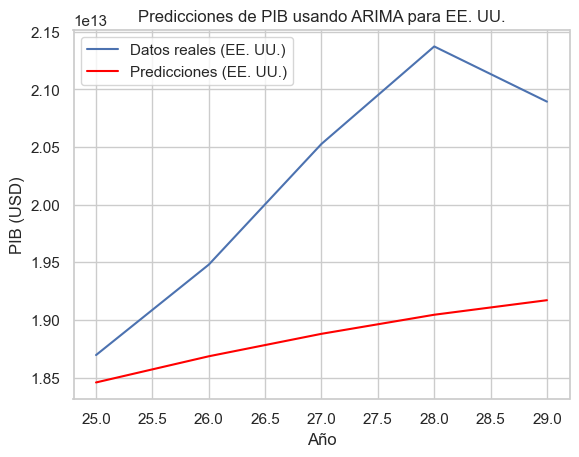

In [37]:
# Visualización de los resultados
sns.set_theme(style="whitegrid")
plt.plot(test_usa.index, test_usa.values, label='Datos reales (EE. UU.)')
plt.plot(test_usa.index, predictions_usa, label='Predicciones (EE. UU.)', color='red')
plt.legend()
plt.title('Predicciones de PIB usando ARIMA para EE. UU.')
plt.xlabel('Año')
plt.ylabel('PIB (USD)')
plt.show()

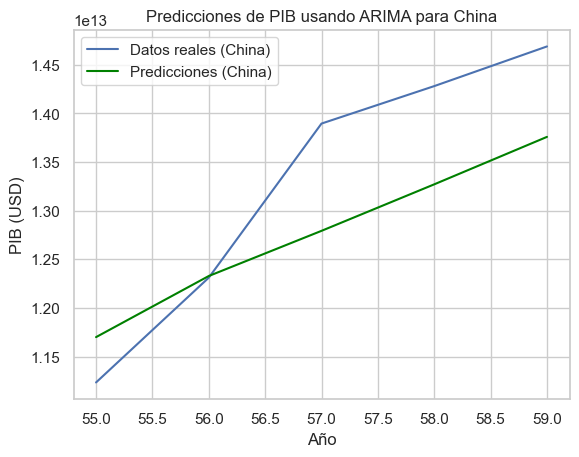

In [39]:
plt.plot(test_china.index, test_china.values, label='Datos reales (China)')
plt.plot(test_china.index, predictions_china, label='Predicciones (China)', color='green')
plt.legend()
plt.title('Predicciones de PIB usando ARIMA para China')
plt.xlabel('Año')
plt.ylabel('PIB (USD)')
plt.show()